## What is a neural network ?
It is essentialy a function:  
$u_θ(x)=\mathcal{N}^L(x)=(\mathcal{N}^L◦\mathcal{N}^{L-1}...\mathcal{N}^0)(x)$
  
  and what we want to find is  
  $\theta^\star= \arg\min_{\theta} L_{\text{data}}(\theta)$
    
  As a loss function, we can use mean squarred error:  
  $L_{\text{data}}(\theta)
= \frac{1}{N_{\text{data}}}
\sum_{i=1}^{N_{\text{data}}}
\left| u_\theta(x_i) - u_i^{\text{data}} \right|^2 $
  
  We apply the algorithm until some criterion, like:  
$\theta^{j+1}=\theta^{j}-l_r∇_\theta L(\theta^j)$


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math

In [68]:
#Our models
class simple_Tanh_NN(nn.Module):
  def __init__(self):
    super(simple_Tanh_NN, self).__init__()
    self.linear_tanh_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.Tanh(),
      nn.Linear(16, 32),
      nn.Tanh(),
      nn.Linear(32, 16),
      nn.Tanh(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    out = self.linear_tanh_stack(x)
    return out

class simple_ReLU_NN(nn.Module):
  def __init__(self):
    super(simple_ReLU_NN, self).__init__()
    self.linear_ReLU_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.ReLU(),
      nn.Linear(16, 32),
      nn.ReLU(),
      nn.Linear(32, 16),
      nn.ReLU(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    out = self.linear_ReLU_stack(x)
    return out

class simple_Sigmoid_NN(nn.Module):
  def __init__(self):
    super(simple_Sigmoid_NN, self).__init__()
    self.linear_Sigmoid_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.Sigmoid(),
      nn.Linear(16, 32),
      nn.Sigmoid(),
      nn.Linear(32, 16),
      nn.Sigmoid(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    out = self.linear_Sigmoid_stack(x)
    return out

# Example: projectile motion

In [70]:
vx = 15 # m/s
vy = 15 # m/s
g = 9.81
delta_t = 0.1 # s
x_init = 0.0
y_init = 0.1
x = []
y = []
t = 0

xi = x_init
yi = y_init
while (yi >= 0):
  xi = xi + vx * delta_t
  yi = yi + vy * delta_t
  vy = vy + -g * delta_t

  t += delta_t

  x.append(xi)
  y.append(yi)


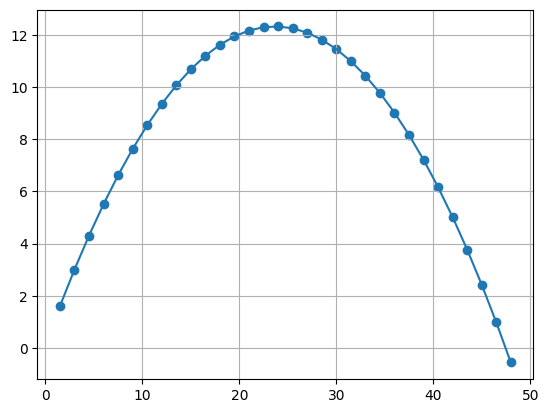

In [71]:
plt.plot(x, y)
plt.scatter(x, y)
plt.grid(which="Major")
plt.show()

In [72]:
x = torch.tensor(x).view(-1, 1)
y = torch.tensor(y).view(-1, 1)

x_original = torch.tensor(x.detach().clone()).view(-1, 1)
y_original = torch.tensor(y.detach().clone()).view(-1, 1)

x_second_half = torch.tensor(x.detach().clone()).view(-1, 1)
y_second_half = torch.tensor(y.detach().clone()).view(-1, 1)

x_second_half = x_second_half[math.floor(len(x)/2):]
y_second_half = y_second_half[math.floor((len(y))/2):]


x = x[:math.floor(len(x)/2)]
y = y[:math.floor(len(y)/2)]


/tmp/ipython-input-48753083.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_original = torch.tensor(x.detach().clone()).view(-1, 1)
/tmp/ipython-input-48753083.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_original = torch.tensor(y.detach().clone()).view(-1, 1)
/tmp/ipython-input-48753083.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_second_half = torch.tensor(x.detach().clone()).view(-1, 1)
/tmp/ipython-input-48753083.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().

## Training the neural network

In [73]:

x = torch.tensor(x).view(-1, 1)
y = torch.tensor(y).view(-1, 1)
model = simple_Tanh_NN()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for ep in range(4000):
  pred = model(x)
  loss = loss_fn(pred, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if ep % 200 == 0:
    print(f"epoch: {ep}, loss: {loss.item():>7f}")


/tmp/ipython-input-2512325400.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).view(-1, 1)
/tmp/ipython-input-2512325400.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).view(-1, 1)


epoch: 0, loss: 85.578903
epoch: 200, loss: 0.007324
epoch: 400, loss: 0.000217
epoch: 600, loss: 0.000155
epoch: 800, loss: 0.000181
epoch: 1000, loss: 0.000099
epoch: 1200, loss: 0.000092
epoch: 1400, loss: 0.000079
epoch: 1600, loss: 0.000097
epoch: 1800, loss: 0.000081
epoch: 2000, loss: 0.002207
epoch: 2200, loss: 0.000083
epoch: 2400, loss: 0.000081
epoch: 2600, loss: 0.000086
epoch: 2800, loss: 0.000084
epoch: 3000, loss: 0.000114
epoch: 3200, loss: 0.000085
epoch: 3400, loss: 0.000179
epoch: 3600, loss: 0.000086
epoch: 3800, loss: 0.000116


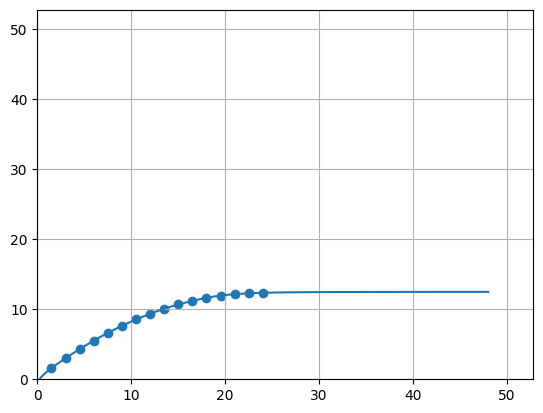

In [74]:
domain = [0.0, 2* float(x[-1])]
x_eval = torch.linspace(domain[0], domain[1], steps=100).reshape(-1, 1)
f_eval = model(x_eval)

plt.plot(x_eval.detach().numpy(), f_eval.detach().numpy() )
plt.scatter(x.detach().numpy(), y.detach().numpy())
plt.grid(which="Major")
plt.xlim(0, float(x[-1]) * 1.1 * 2)
plt.ylim(0, float(x[-1]) * 1.1 * 2)
plt.show()

In [62]:
class simple_Tanh_NN(nn.Module):
  def __init__(self):
    super(simple_Tanh_NN, self).__init__()
    self.linear_tanh_stack = nn.Sequential(
      nn.Linear(1, 16),
      nn.Tanh(),
      nn.Linear(16, 32),
      nn.Tanh(),
      nn.Linear(32, 16),
      nn.Tanh(),
      nn.Linear(16, 1),
    )
  def forward(self, x):
    x_scaled = x / 50.0
    out = self.linear_tanh_stack(x_scaled)
    return out * 50.0

# What are PINNs ?
Physics-Informed Neural Network is a neural network that is penalized for violating known physical laws, expressed as differential equations  
We can add another component to the loss:  
$L_{\text{PDE}}(\theta)
= \frac{1}{N_c}
\sum_{i=1}^{N_c}
\left| \mathcal{F}\!\left(u_\theta(x_i)\right) \right|^2$  


In the case of projectile motion, the differential equation that governs the motion is:  
$\frac{d^2y}{dx^2}=-\frac{g}{v_x^2}$  
Therefore, our differential operator is:  
$\mathcal{F}[y]=\frac{d^2y}{dx^2}+\frac{g}{v_x^2}$  
and residual becomes:  
$\mathcal{F}(u_\theta(x))=\frac{d^2y_\theta}{dx^2}(x)+\frac{g}{v_x^2}$

In [75]:
def physics_loss(model, x):
    g = 9.81
    vx = 15.0

    y = model(x)

    # First derivative dy/dx
    dy_dx = torch.autograd.grad(
        outputs=y,
        inputs=x,
        grad_outputs=torch.ones_like(y),
        create_graph=True
    )[0]

    # Second derivative d2y/dx2
    d2y_dx2 = torch.autograd.grad(
        outputs=dy_dx,
        inputs=x,
        grad_outputs=torch.ones_like(dy_dx),
        create_graph=True
    )[0]
    physics_residual = d2y_dx2 + (g / (vx**2))

    return torch.mean(physics_residual**2)

We do not need to know the values of derivatives at same points as our data, these points can be elsewhere, and usually less of them.

In [76]:
lambda_physics = 10  # 1e-1
x_physics = torch.linspace(0, 50, 100).view(-1, 1).requires_grad_(True)

model = simple_Tanh_NN()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

x.requires_grad_(True)

for ep in range(3000):
  optimizer.zero_grad()

  pred = model(x)
  loss_data = loss_fn(pred, y)

  lambda_data = 1e-4
  loss_phys = physics_loss(model, x_physics)
  loss = (lambda_data * loss_data) + (lambda_physics * loss_phys)


  loss.backward()
  optimizer.step()

  if ep % 500 == 0:
    print(f"epoch: {ep}, loss: {loss.item():>7f}")
    print(f"loss_data: {loss_data.item():>7f}, loss_physics: {loss_phys.item():>7f}")


epoch: 0, loss: 0.030191
loss_data: 93.587830, loss_physics: 0.002083
epoch: 500, loss: 0.010666
loss_data: 18.036015, loss_physics: 0.000886
epoch: 1000, loss: 0.007259
loss_data: 7.098646, loss_physics: 0.000655
epoch: 1500, loss: 0.005502
loss_data: 7.015728, loss_physics: 0.000480
epoch: 2000, loss: 0.004485
loss_data: 9.401583, loss_physics: 0.000354
epoch: 2500, loss: 0.003943
loss_data: 12.394590, loss_physics: 0.000270


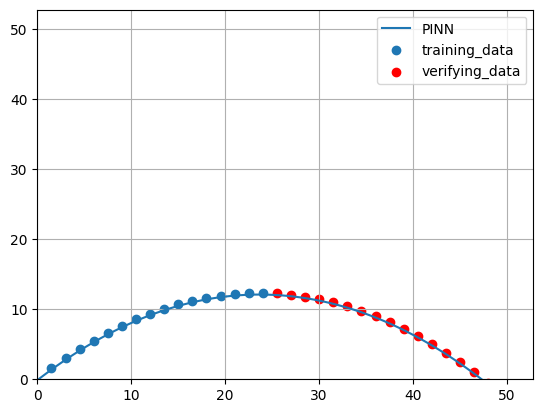

In [66]:
domain = [0.0, 2* float(x[-1])]
x_eval = torch.linspace(domain[0], domain[1], steps=100).reshape(-1, 1)
f_eval = model(x_eval)

plt.plot(x_eval.detach().numpy(), f_eval.detach().numpy(), label="PINN")
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='training_data')
plt.scatter(x_second_half.detach().numpy(), y_second_half.detach().numpy(), c="red", label="verifying_data")
plt.grid(which="Major")
plt.xlim(0, float(x[-1]) * 1.1 * 2)
plt.ylim(0, float(x[-1]) * 1.1 * 2)
plt.legend()
plt.savefig("Trajectory_With_PINN.png")
plt.show()

## Boundary conditions
There are 2 types of implementing boundary conditions: vanilla PINNs and hard PINNs.

### vanilla PINNs
Boundary conditions are satisfied just by adding them to the total loss:  
$\mathcal{L}=\lambda_{DATA}\mathcal{L}_{DATA}+\lambda_{PDE}\mathcal{L}_{PDE}+\lambda_{BC}\mathcal{L}_{BC}$  

pros:
- work for any boundary conditions types
- simple and flexible  

cons:  
- boundary is not exact
- additional weight tuning
- errors can concentrate near boundaries


hard PINNs

Boundary conditions are "baked" into the solution, and we are now interested in the trial function:  
$u_\theta (x)=A(x)+B(x)u^*_\theta(x)$  
where A(x) satisfies the BC exactly and B(x) vanishes on the boundary

pros:  

- BCs are exact
- better accuracy near the boundaries
- no need for weighting for BC loss

cons:  

- A(x) and B(x) must be constructed manually
- hard or impossible for some systems, for example Neumann BC

# Example: Laplace equation
$u_{xx}+u_{yy}=0$, with exact solution of $u(x,y)=x^2-y^2$

Vanilla PINNs:

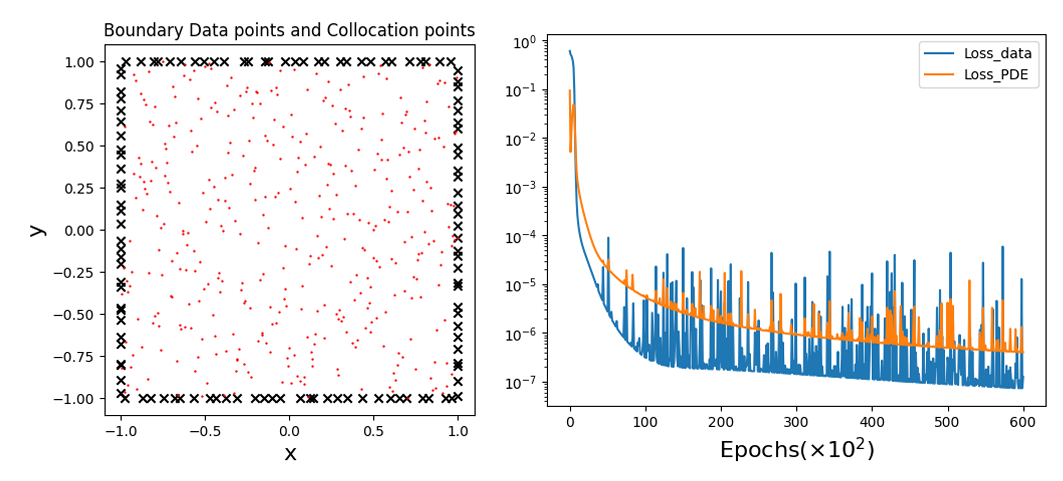

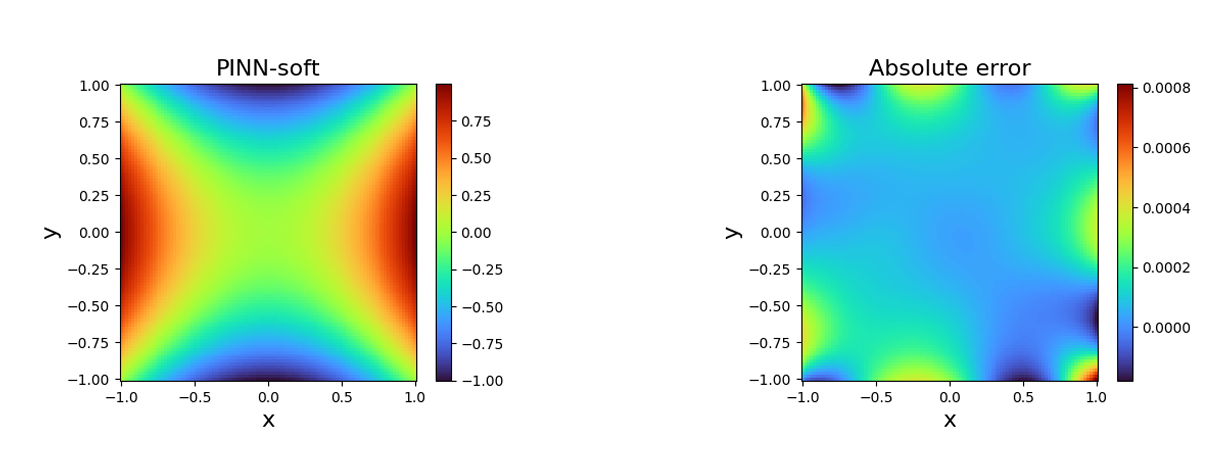

hard PINNs, where:    
$B = (1-x)(1+x)(1-y)(1+y)\\
A = (1-y^2)+(x^2-1) $

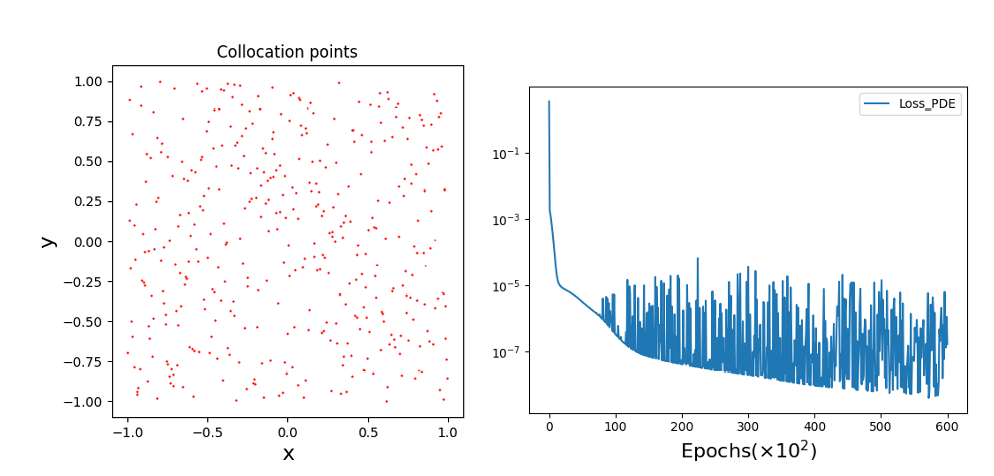

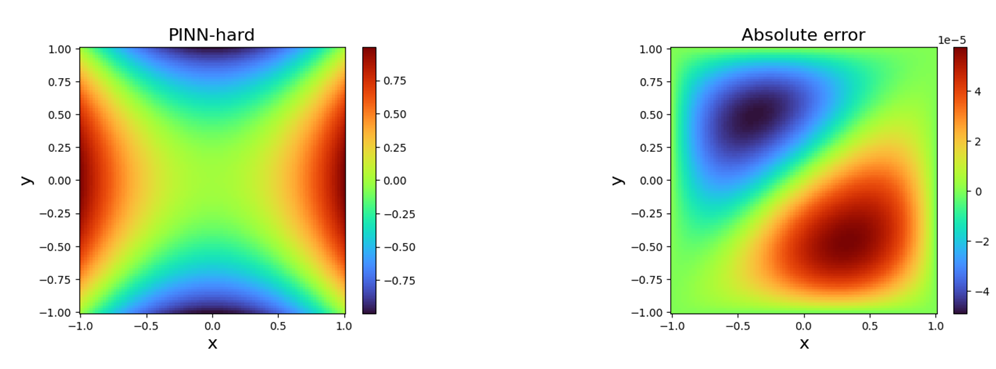